In [78]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
#Importing of dataset to dataframe. 
df = pd.read_csv("/content/iris.csv")



In [80]:
#To see first 5 rows of the dataset
df.head()
#To know the data types of the variables.
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [81]:
#Speceis is the output class,to know the count of each class we use value_counts()
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [82]:
#Separating independant variable and dependent variable("Species")
X = df.drop(['variety'], axis=1)
y = df['variety']
print(X.head())




   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [83]:
print(y.head())

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


In [84]:

print(X.shape)

print(y.shape)

(150, 4)
(150,)


In [85]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [87]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [88]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array(['Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Versico

In [89]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [90]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [91]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

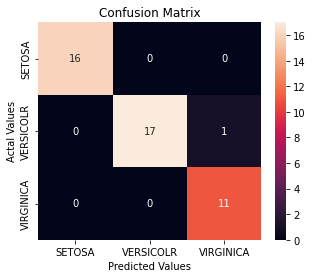

In [92]:
#Plotting the confusion matrix
#Calculate the Confusion Matrix by the actual and predicted values.
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [94]:
#how to calculate each metric individually using sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred, average='macro'))
print('Recall:   ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.9777777777777777
Precision: 0.9722222222222222
Recall:    0.9814814814814815
F1 Score:  0.975983436853002


In [95]:
from sklearn.datasets import load_iris
dataset = load_iris()


In [96]:
X = dataset['data']
y = dataset['target']


In [97]:
#Apply normalization operation for numerical stability.
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
#Fit Logistic Regression Model to the train data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [98]:
#Make predictions on the data using cross-validation.
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=10)


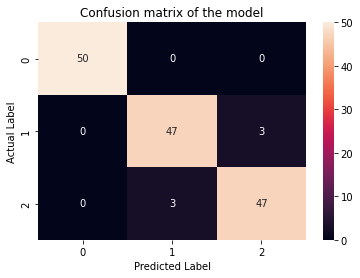

In [99]:
#Calculate the Confusion Matrix by the actual and predicted values.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel('Actual Label')
plt.title('Confusion matrix of the model')
plt.show()